In [41]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
from scipy import signal

In [42]:
# Lab4.1
img1 = cv2.imread('Image5.jpg')
img1 = cv2.resize(img1,(224,224))
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
h = img1.shape[0]
w = img1.shape[1]
size = (w,h)
print(size)
model = VGG16()
model.summary()
kernels, biases = model.layers[1].get_weights()
model.layers[1].get_config()


(224, 224)
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)  

{'name': 'block1_conv1',
 'trainable': True,
 'dtype': 'float32',
 'filters': 64,
 'kernel_size': (3, 3),
 'strides': (1, 1),
 'padding': 'same',
 'data_format': 'channels_last',
 'dilation_rate': (1, 1),
 'groups': 1,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [43]:
img = img_to_array(img1)
img = expand_dims(img, axis=0)
img_ready = preprocess_input(img)
print(img_ready)
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()
feature_maps = model.predict(img_ready)

[[[[-32.939003 -32.779    -25.68    ]
   [-32.939003 -31.779    -26.68    ]
   [-30.939003 -29.779    -24.68    ]
   ...
   [ 38.060997  36.221     37.32    ]
   [ 37.060997  35.221     36.32    ]
   [ 37.060997  35.221     36.32    ]]

  [[-30.939003 -30.779    -23.68    ]
   [-30.939003 -29.779    -24.68    ]
   [-31.939003 -30.779    -25.68    ]
   ...
   [ 40.060997  38.221     39.32    ]
   [ 40.060997  38.221     39.32    ]
   [ 39.060997  37.221     38.32    ]]

  [[-32.939003 -31.779    -26.68    ]
   [-34.939003 -33.779    -28.68    ]
   [-30.939003 -29.779    -24.68    ]
   ...
   [ 36.060997  34.221     35.32    ]
   [ 40.060997  38.221     39.32    ]
   [ 39.060997  37.221     38.32    ]]

  ...

  [[-40.939003 -44.779    -47.68    ]
   [-38.939003 -42.779    -45.68    ]
   [-37.939003 -41.779    -44.68    ]
   ...
   [ 64.061     57.221     61.32    ]
   [ 63.060997  56.221     60.32    ]
   [ 63.060997  56.221     60.32    ]]

  [[-39.939003 -44.779    -47.68    ]
   [-36

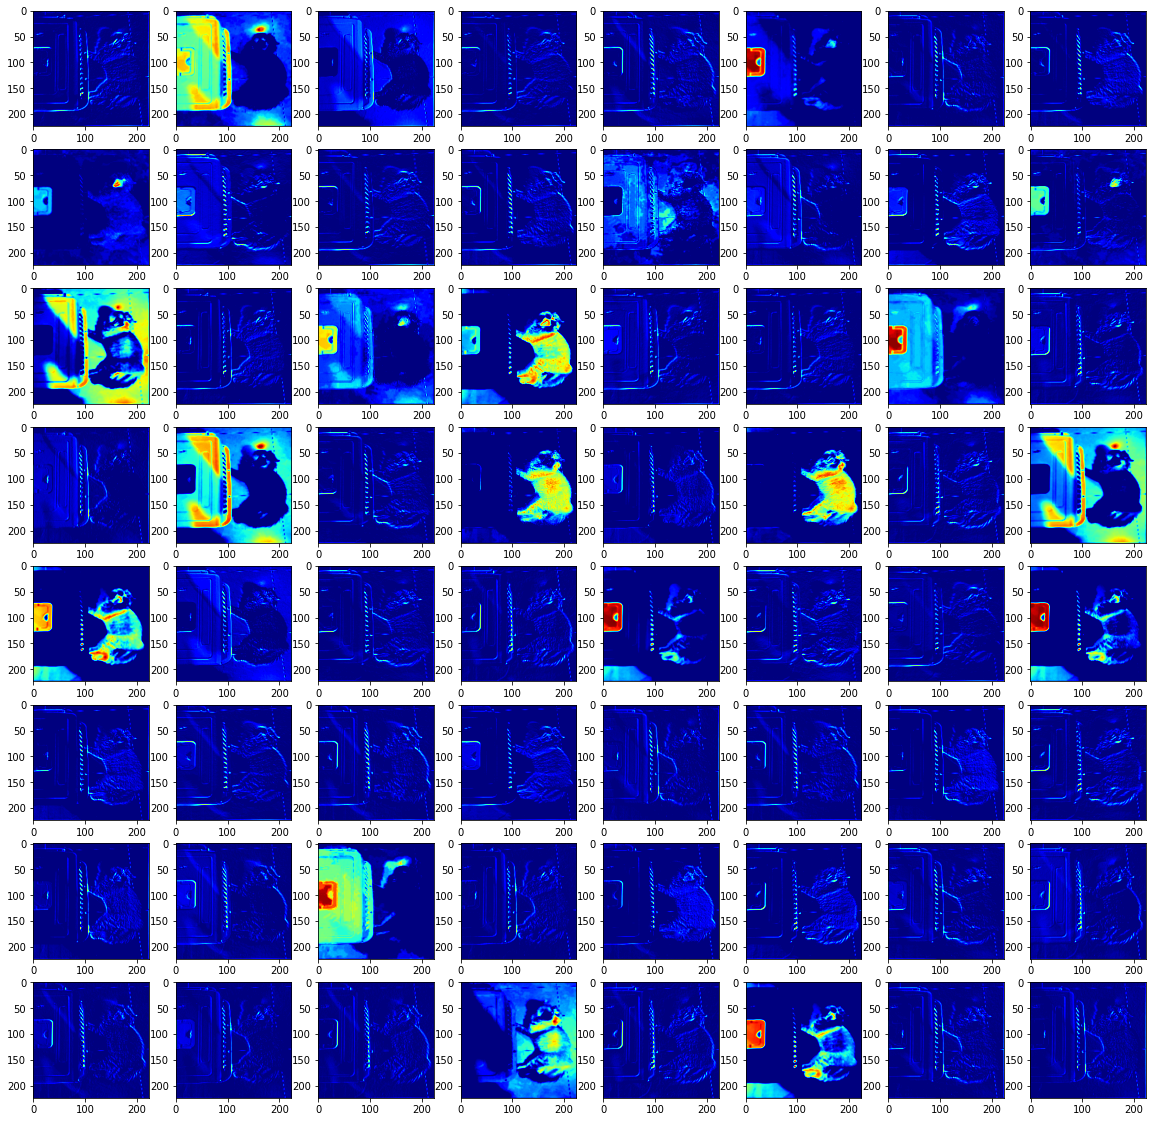

In [44]:

# plot all 64 maps in an 8x8 squares
plt.figure(figsize=(20,20))
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		plt.subplot(square,square,ix)
		# plot filter channel in grayscale
		plt.imshow(feature_maps[0, :, :, ix-1], cmap='jet')
		ix += 1
# show the figure
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


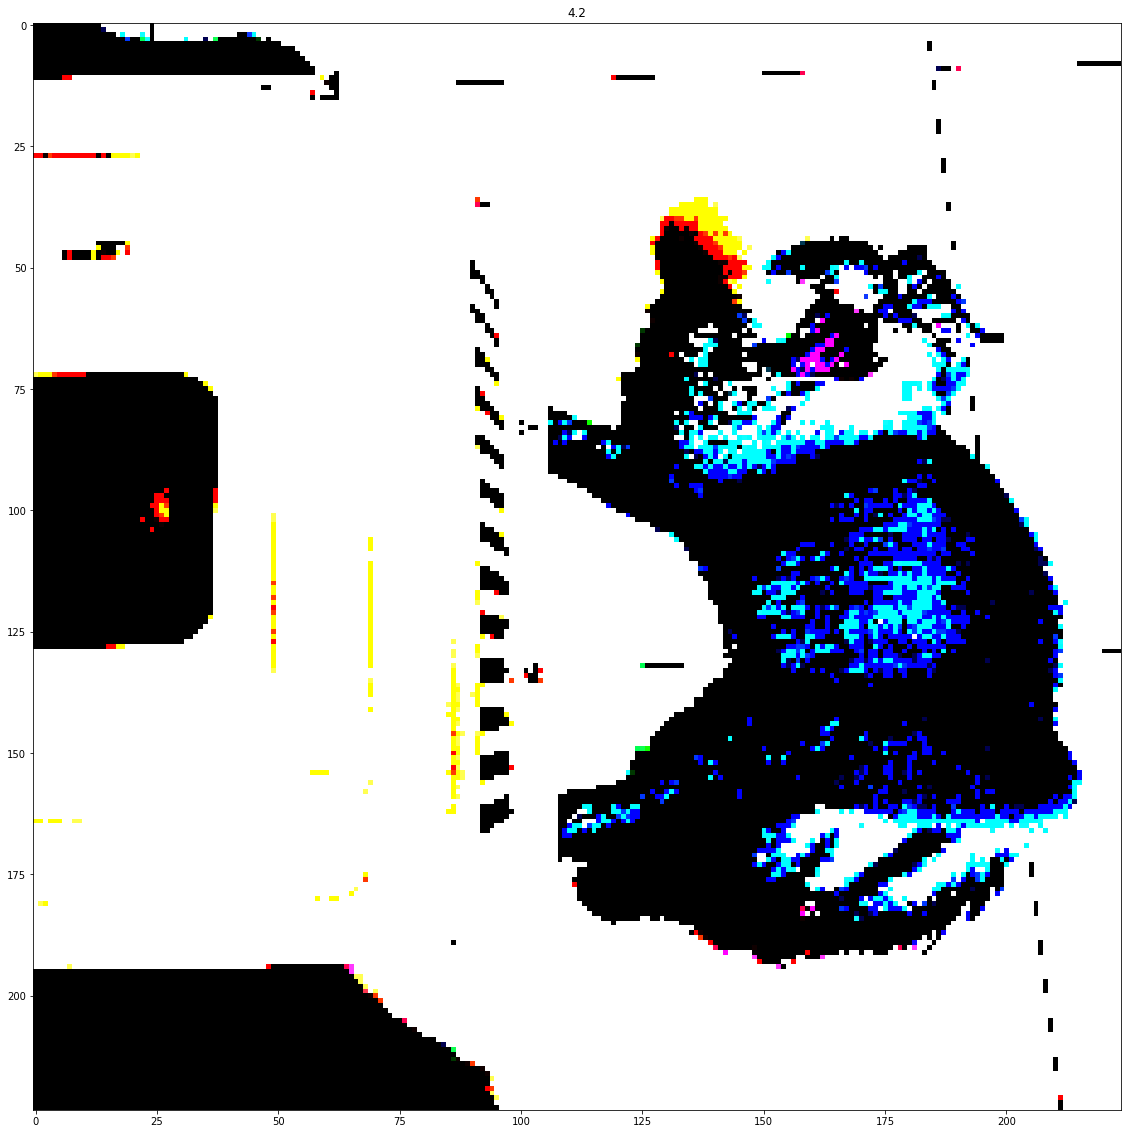

(1, 224, 224, 3)


In [45]:
# Lab4.2
img2 = cv2.imread('Image5.jpg')
img2 = cv2.resize(img2,(224,224))

img2 = img2.astype("float")
mean = [103.939,116.779,123.68]

for h in range(0,224):
    for w in range(0,224):
        for c in range(0,3):
            img2[h][w][c] = img2[h][w][c] - mean[c]
plt.figure(figsize=[20 ,20])

# Original Color Image
plt.subplot(1,1,1)
plt.title('4.2')
plt.imshow(img2)

plt.show()
img2 = img2.reshape((1,) + img2.shape)
print(img2.shape)




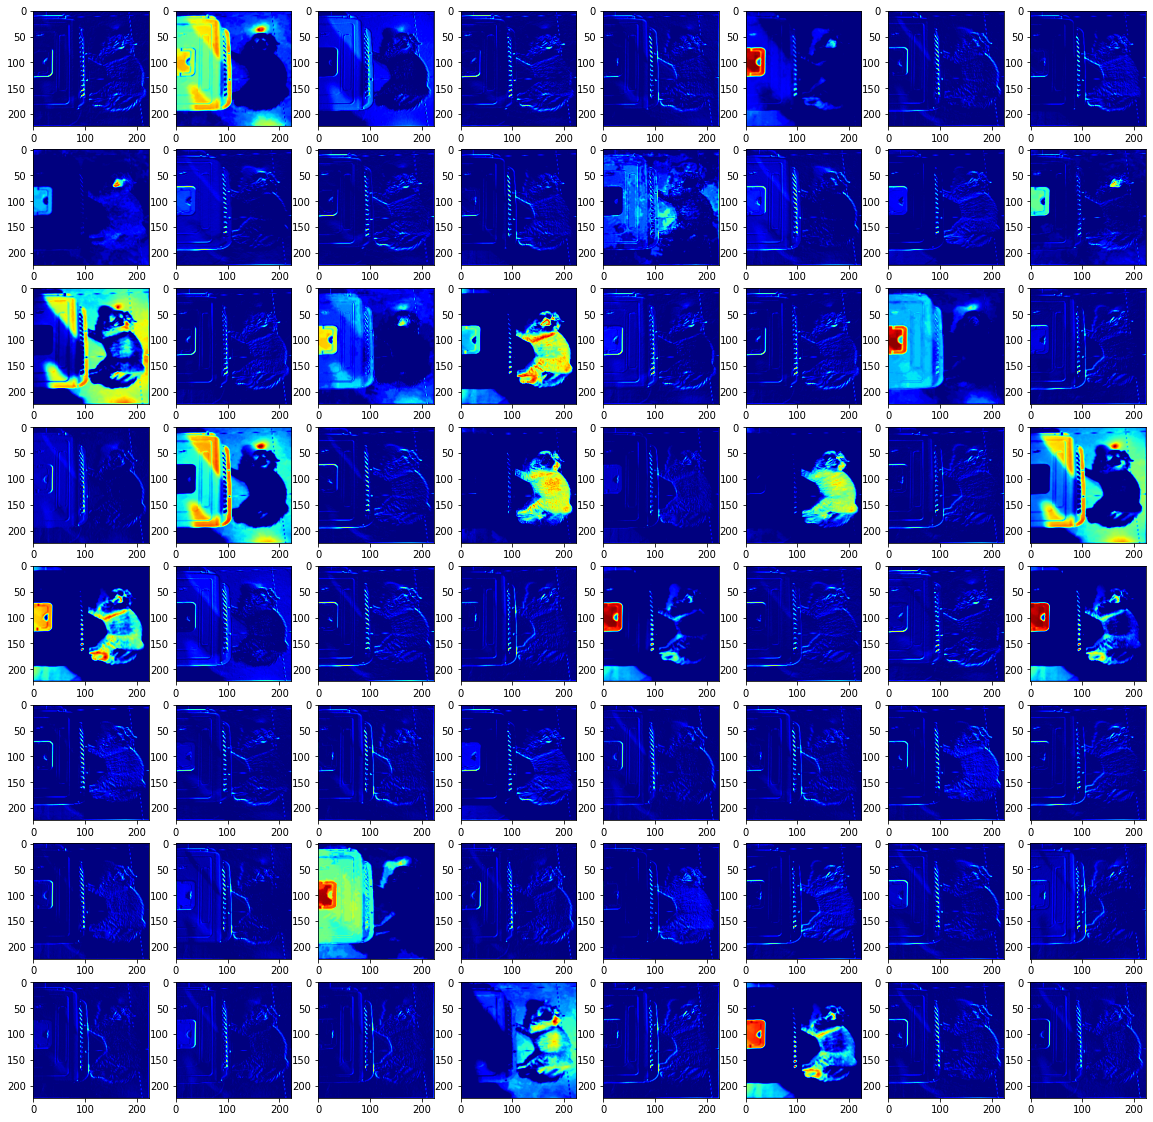

In [46]:
# Lab4.3
Size = 8
fig = plt.figure(figsize=(20,20))
img3 = np.zeros((224,224,3))

for i in range(0,64):
  for c in range(0,3):
    img3[:, :, c] = signal.convolve2d(img2[0, :, :, c], kernels[:, :,c,i], mode='same',boundary='fill', fillvalue=0)
  img_result = img3[:,:,0] + img3[:,:,1] + img3[:,:,2]
  img_result = np.where(img_result < 0,0, img_result)

  fig.add_subplot(Size, Size, i+1)
  plt.imshow(img_result, cmap="jet")

  